<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Naive_Bayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are given with the Salary dataset.

The task here is to prepare a classification model by using Naive Bayes Algorithm. 

In [ ]:
# First Load the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB as NB

Training Dataset

In [ ]:
# Loading the Training Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
SD_Train = pd.read_csv('SalaryData_Train.csv')
SD_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# We donot need duplicate elements.So , we discard them

In [ ]:
sd_train = SD_Train.drop_duplicates()
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Checking for null values

In [ ]:
sd_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

No Null values . Proceeding Further 

In [ ]:
# Viewing overall description of the dataset.

In [ ]:
sd_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Label Encoding 

In [ ]:
# We know that the datset contains categories where we cannot implement the 
# Naive Bayes function directly.
# we need to convert them to labels.
# This is done by using LabelEncoder Technique

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


Now,for each column,whereever ,there are categories, we aply this method to convert them to labels.

In [ ]:
sd_train['workclass'] = labelencoder.fit_transform(sd_train['workclass'])
sd_train['education'] = labelencoder.fit_transform(sd_train['education'])
sd_train['maritalstatus']= labelencoder.fit_transform(sd_train['maritalstatus'])
sd_train['occupation']= labelencoder.fit_transform(sd_train['occupation'])
sd_train['relationship']= labelencoder.fit_transform(sd_train['relationship'])
sd_train['race']= labelencoder.fit_transform(sd_train['race'])
sd_train['sex']= labelencoder.fit_transform(sd_train['sex'])
sd_train['native']= labelencoder.fit_transform(sd_train['native'])
sd_train['Salary']= labelencoder.fit_transform(sd_train['Salary'])

<ipython-input-14-6d9612f767af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_train['workclass'] = labelencoder.fit_transform(sd_train['workclass'])
<ipython-input-14-6d9612f767af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_train['education'] = labelencoder.fit_transform(sd_train['education'])
<ipython-input-14-6d9612f767af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


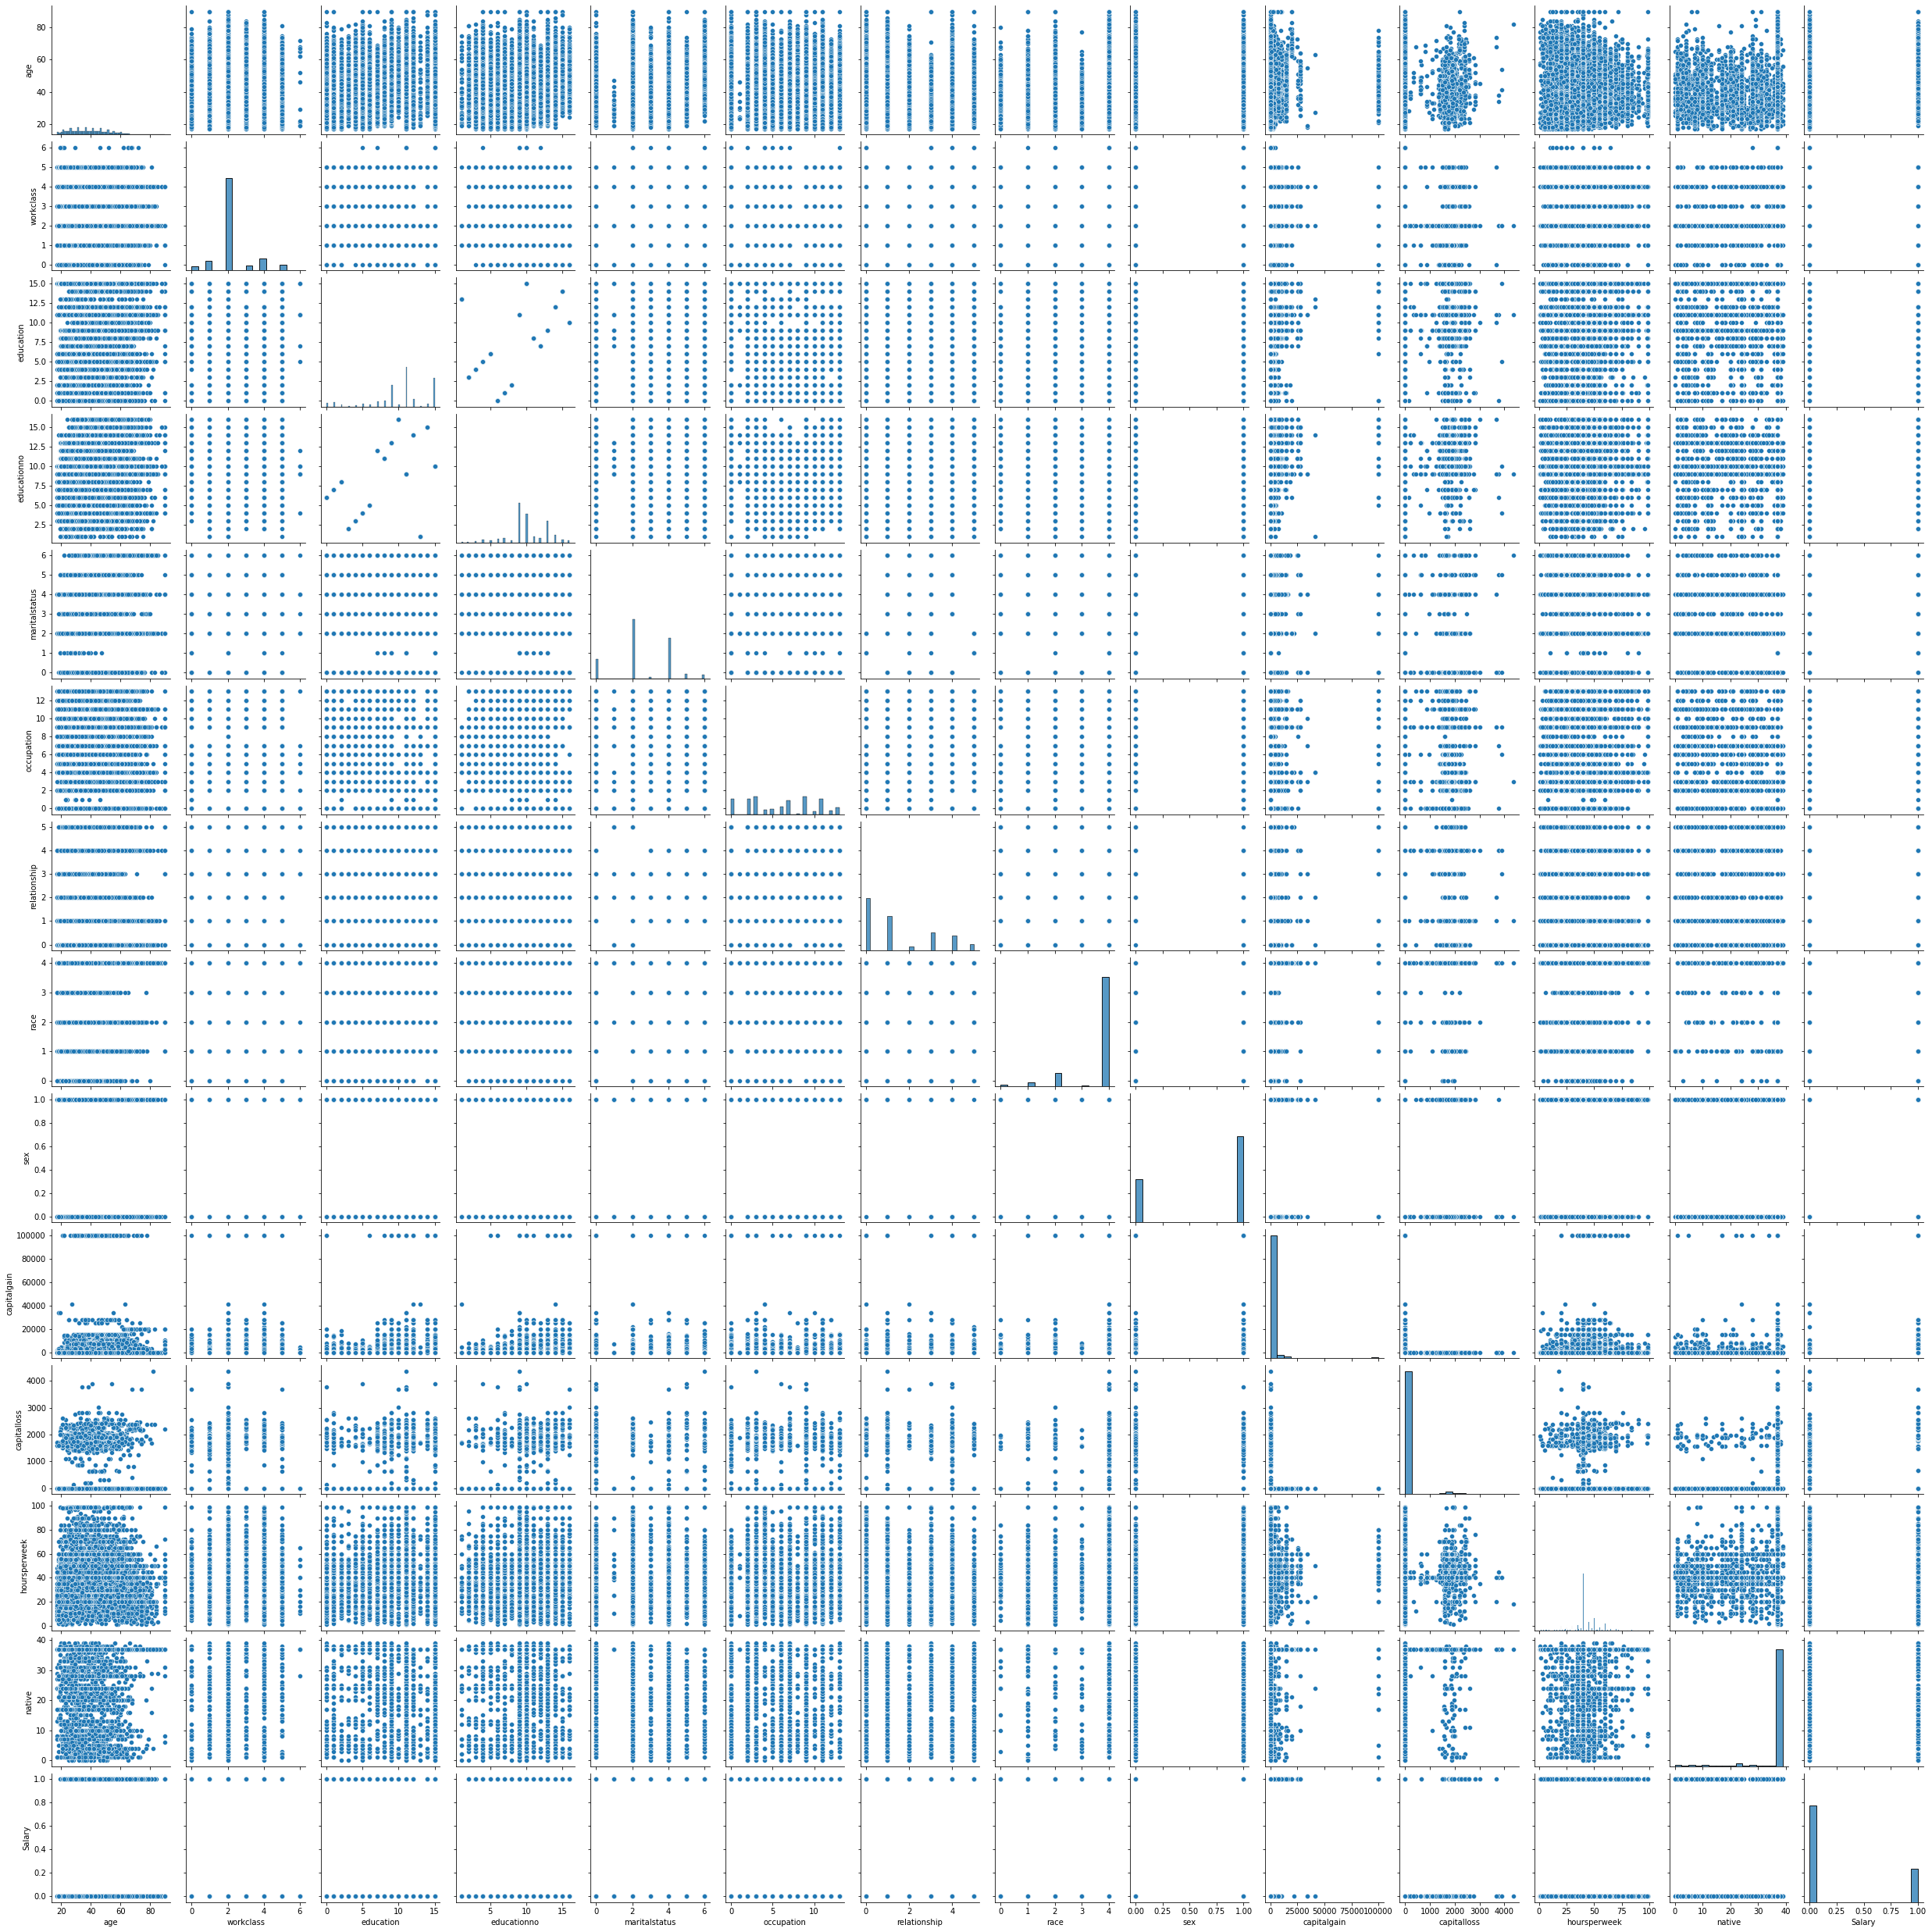

In [ ]:
sns.pairplot(sd_train)

In [ ]:
# Finding correlation

sd_train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


In [ ]:
#  TEST DATASET

In [ ]:
# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
# Reading the dataset

sd_test = pd.read_csv('SalaryData_Test.csv')
sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
# It may contain some duplicate values.
# So, we need to drop those values.

In [ ]:
SD_TEST = sd_test.drop_duplicates()
SD_TEST

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Label Encoding for Named values

In [ ]:
# Importing Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating an Object of Function
labelencoder = LabelEncoder()

SD_TEST['workclass'] = labelencoder.fit_transform(SD_TEST['workclass'])
SD_TEST['education'] = labelencoder.fit_transform(SD_TEST['education'])
SD_TEST['maritalstatus'] = labelencoder.fit_transform(SD_TEST['maritalstatus'])
SD_TEST['occupation'] = labelencoder.fit_transform(SD_TEST['occupation'])
SD_TEST['relationship'] = labelencoder.fit_transform(SD_TEST['relationship'])
SD_TEST['race'] = labelencoder.fit_transform(SD_TEST['race'])
SD_TEST['sex'] = labelencoder.fit_transform(SD_TEST['sex'])
SD_TEST['native'] = labelencoder.fit_transform(SD_TEST['native'])
SD_TEST['Salary'] = labelencoder.fit_transform(SD_TEST['Salary'])

<ipython-input-26-3afc850674d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_TEST['workclass'] = labelencoder.fit_transform(SD_TEST['workclass'])
<ipython-input-26-3afc850674d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_TEST['education'] = labelencoder.fit_transform(SD_TEST['education'])
<ipython-input-26-3afc850674d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
SD_TEST

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:
# Checking the information of the dataset
SD_TEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [ ]:
SD_TEST.shape

(14130, 14)

In [ ]:
# Checking for null values
SD_TEST.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

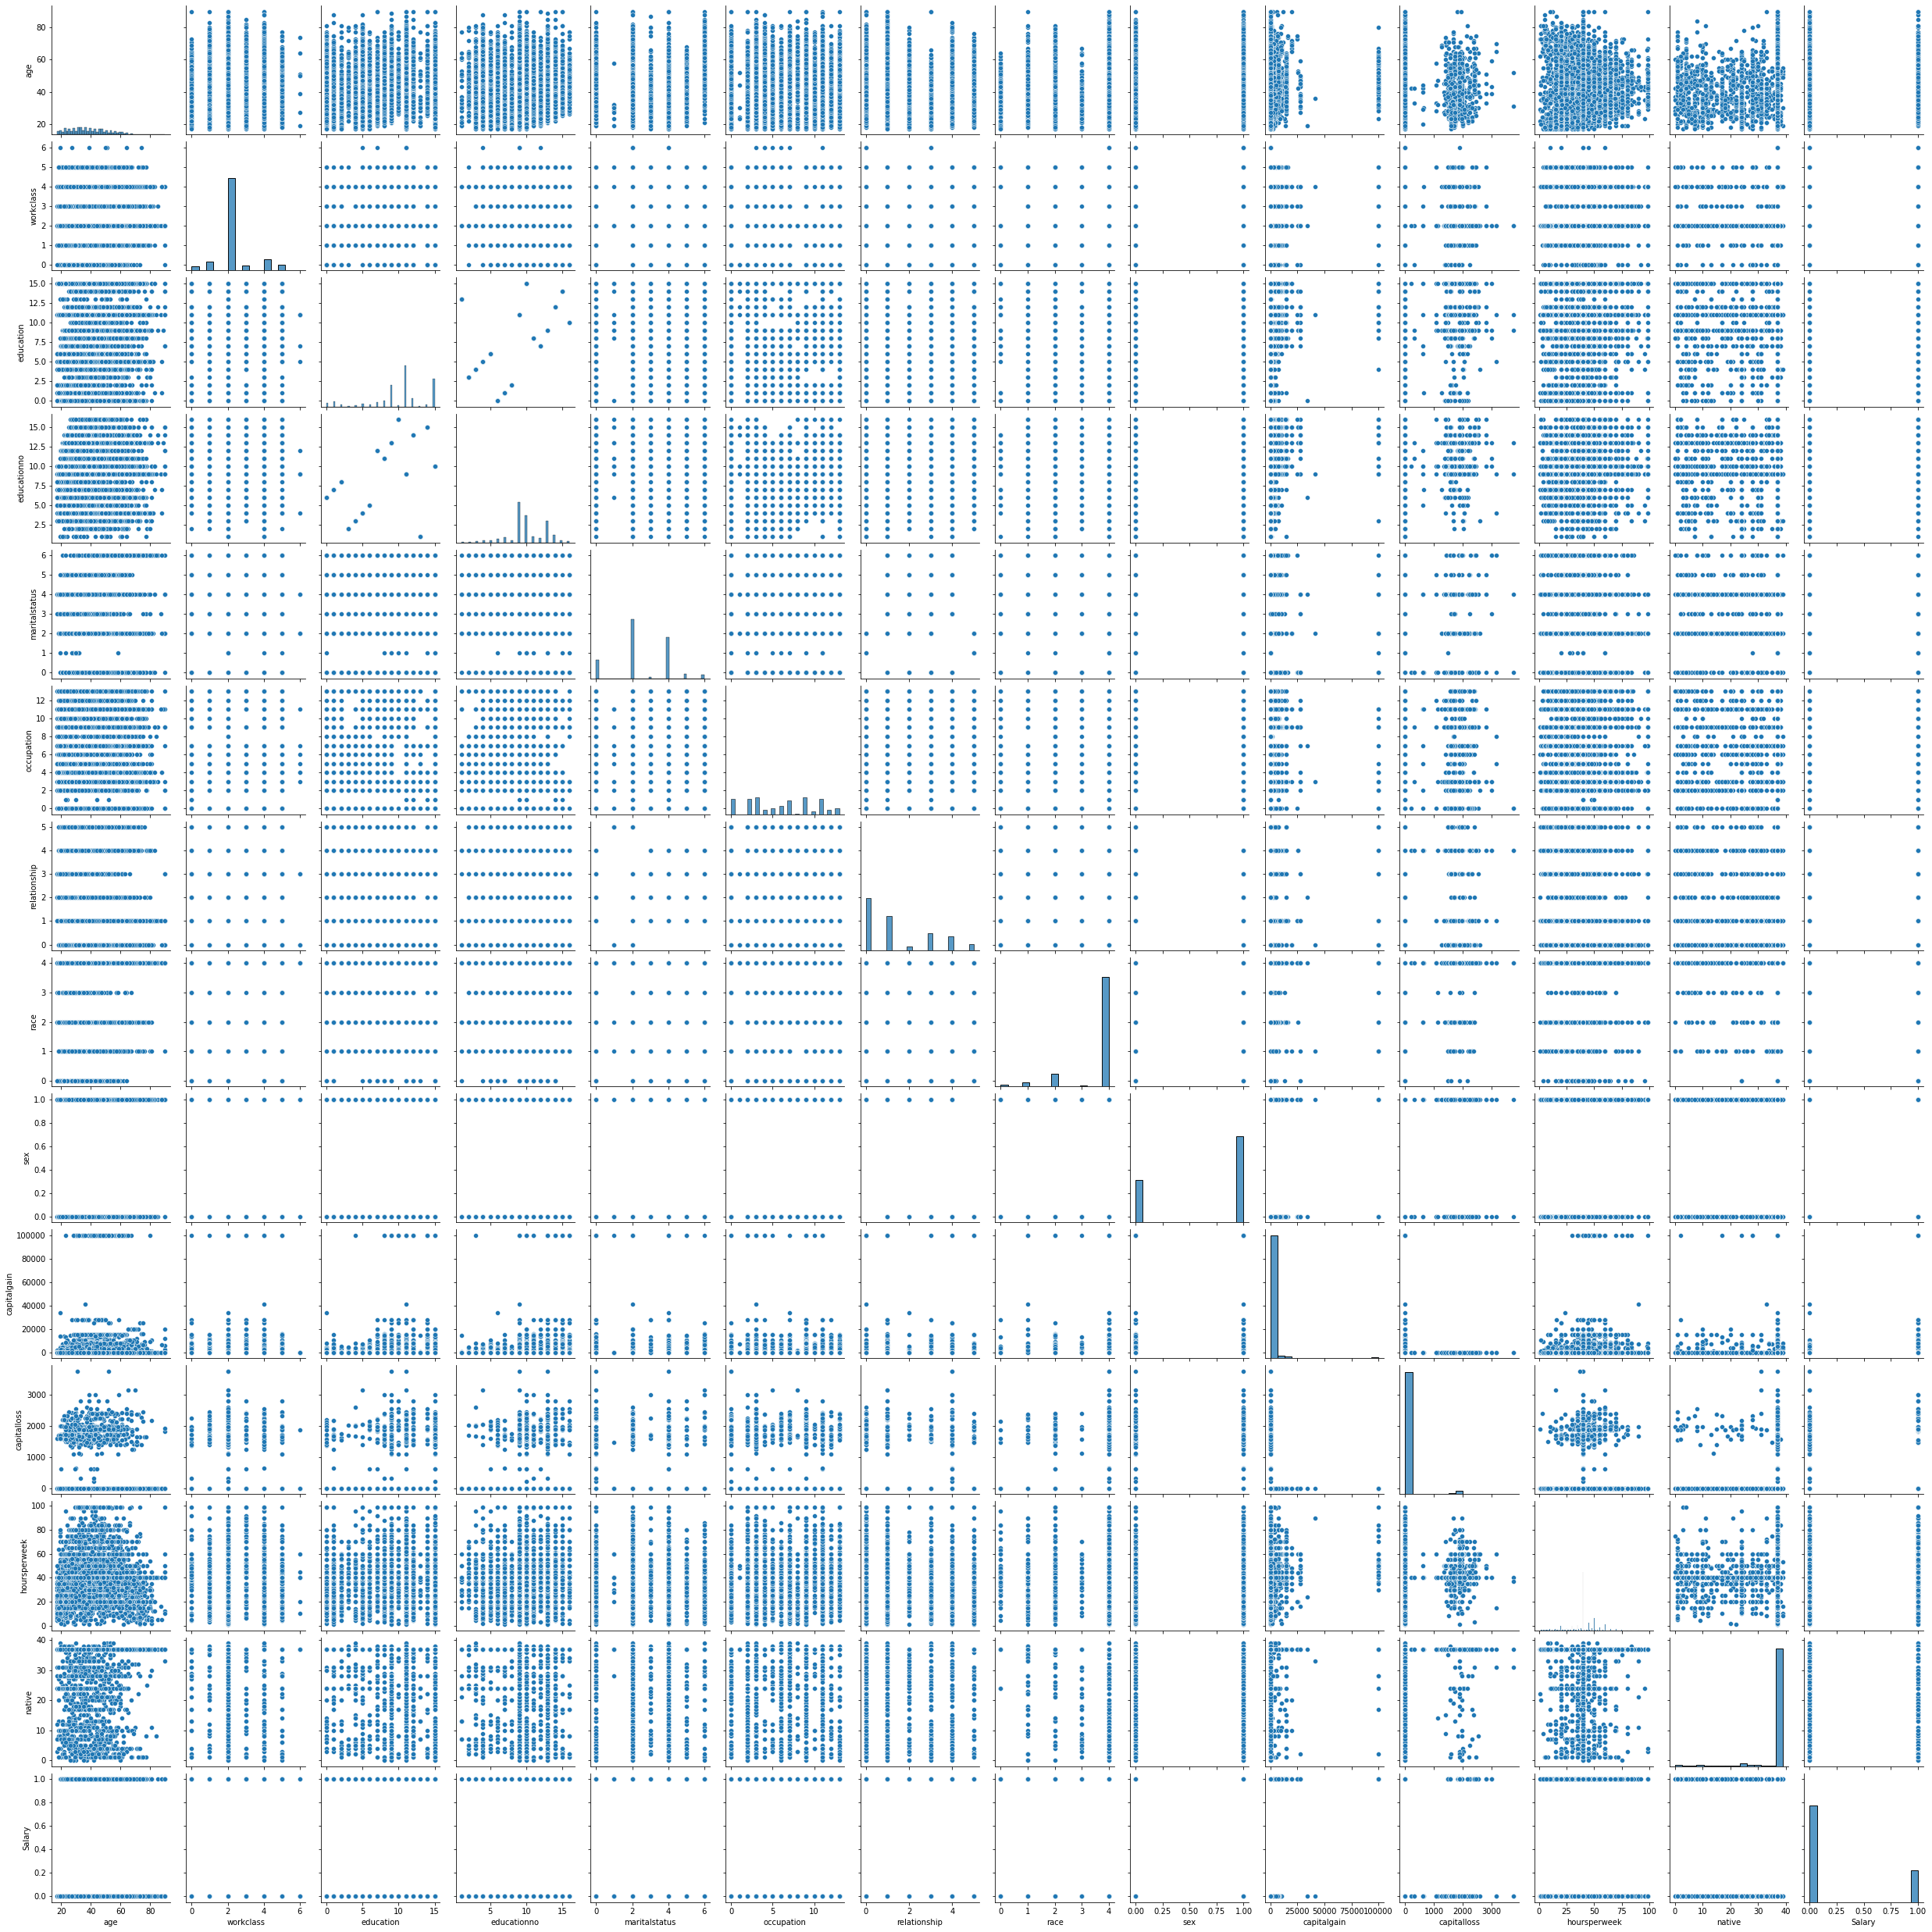

In [ ]:
# Creating Pairplots
sns.pairplot(SD_TEST)

In [ ]:
# Finding Correlation Graph
SD_TEST.corr() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.092686,-0.004167,0.021979,-0.245822,-0.003881,-0.241180,0.035180,0.075150,0.076765,0.053172,0.088090,0.001787,0.216703
workclass,0.092686,1.000000,0.021149,0.047708,-0.030821,0.020147,-0.063257,0.064707,0.062290,0.031858,0.007808,0.051189,-0.000432,0.011495
education,-0.004167,0.021149,1.000000,0.361666,-0.044471,-0.017227,-0.013293,0.007635,-0.027574,0.030424,0.024271,0.064155,0.075685,0.092476
educationno,0.021979,0.047708,0.361666,1.000000,-0.070693,0.093437,-0.080444,0.030924,0.000603,0.132346,0.085651,0.127779,0.099699,0.326777
maritalstatus,-0.245822,-0.030821,-0.044471,-0.070693,1.000000,-0.001040,0.172341,-0.076084,-0.114448,-0.042549,-0.033647,-0.165199,-0.017963,-0.185870
occupation,-0.003881,0.020147,-0.017227,0.093437,-0.001040,1.000000,-0.054695,0.004326,0.050982,0.011623,0.012946,0.014548,0.003006,0.046633
relationship,-0.241180,-0.063257,-0.013293,-0.080444,0.172341,-0.054695,1.000000,-0.119236,-0.580247,-0.056609,-0.051241,-0.257082,0.003405,-0.254418
race,0.035180,0.064707,0.007635,0.030924,-0.076084,0.004326,-0.119236,1.000000,0.087171,0.016730,0.020725,0.041720,0.120543,0.073101
sex,0.075150,0.062290,-0.027574,0.000603,-0.114448,0.050982,-0.580247,0.087171,1.000000,0.047180,0.048382,0.227884,-0.017165,0.212100
capitalgain,0.076765,0.031858,0.030424,0.132346,-0.042549,0.011623,-0.056609,0.016730,0.047180,1.000000,-0.033929,0.089512,0.008189,0.225871


In [ ]:
# Applying Test nd Train dataset
x_train = sd_train.iloc[:,0:13]
y_train = sd_train.iloc[:,-1]
x_test = SD_TEST.iloc[:,0:13]
y_test = SD_TEST.iloc[:,-1]

In Naive Bayes Algorithm , we have three different Classifiers . They are:

i) Categorical NB

ii)Multinomial NB

iii)Gaussian NB

**Categorical NB**

In [ ]:
from sklearn.naive_bayes import CategoricalNB as CNB

In [ ]:
cnb = CNB()
cnb.fit(x_train,y_train)

CategoricalNB()

In [ ]:
# Model Accuracy on train set
train_pred_cnb = cnb.predict(x_train)
accuracy_train_cnb = np.mean(train_pred_cnb==y_train) 

In [ ]:
# Model Accuracy on test set
test_pred_cnb = cnb.predict(x_train)
accuracy_test_cnb = np.mean(test_pred_cnb==y_train)

In [ ]:
accuracy_train_cnb

0.8539196372151805

In [ ]:
accuracy_test_cnb

0.8539196372151805

**Multinomial NB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MNB

In [ ]:
mnb = MNB()

In [ ]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Model Accuracy on train set
train_pred_mnb = mnb.predict(x_train)
accuracy_train_mnb = np.mean(train_pred_mnb==y_train) 

In [ ]:
# Model Accuracy on test set
test_pred_mnb = mnb.predict(x_train)
accuracy_test_mnb = np.mean(test_pred_mnb==y_train)

In [ ]:
accuracy_train_mnb

0.7683158012117608

In [ ]:
accuracy_test_mnb

0.7683158012117608

**Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

In [ ]:
gnb = GNB()

In [ ]:
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# Model Accuracy on train set
train_pred_gnb = gnb.predict(x_train)
accuracy_train_gnb = np.mean(train_pred_gnb==y_train) 

In [ ]:
# Model Accuracy on test set
test_pred_gnb = gnb.predict(x_train)
accuracy_test_gnb = np.mean(test_pred_gnb==y_train)

In [ ]:
accuracy_train_gnb

0.7933687692822362

In [ ]:
accuracy_test_gnb

0.7933687692822362

**CONCLUSION:**  From the above predictions , we say that **Categorical Naive Bayes Classifier** gives the better accuracy for this model in this dataset.